### Unsupervised Learning
- Clustering
    - K-Means Clustering
    - Hierarchical Clustering
- Performance Evaluation Techniques
    - Silhouette Score
    - Davies-Boulding Index - DBI

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Clustering

- When you need to group similar data points without labeled outputs.
- Useful for exploratory analysis, customer segmentation, anomaly detection, etc.
- Works well when patterns or natural groupings exist in the data.

<table border="1"> <tr> <th>Pros</th> <th>Cons</th> </tr> <tr> <td>Unsupervised → no need for labeled data.</td> <td>Results may vary with initialization (e.g., K-Means clustering).</td> </tr> <tr> <td>Helps discover hidden structures/patterns in data.</td> <td>Choosing the right number of clusters can be challenging.</td> </tr> <tr> <td>Applicable in many domains → marketing, biology, image analysis, anomaly detection.</td> <td>Cluster boundaries may be unclear when data overlaps.</td> </tr> <tr> <td>Scalable methods exist for large datasets.</td> <td>Sensitive to noise and outliers → can distort clusters.</td> </tr> <tr> <td>Can be combined with dimensionality reduction for better insights.</td> <td>Interpretability may be limited → clusters don’t always have clear meaning.</td> </tr> </table>

#### K-Means Clustering
- Works best when clusters are roughly equally sized, and well separated.
- Simple, fast, and easy to implement and works well as a preprocessing step for other algorithms.
- However, requires the number of clusters (k) to be specified in advance.
- Sensitive to initialization (can converge to local minima).
- Affected by outliers and noise, which can distort centroids.

In [30]:
# K-Means Clustering with Elbow Method
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# -----------------------------
# 1. Generate synthetic dataset
# -----------------------------
X, y = make_blobs(
    n_samples=1500,          # 500 data points in total
    n_features=4,           # 4 features
    centers=4,              # 5 clusters. Each cluster is centered around a different randomly chosen centroid.
    cluster_std=3.0,        # Controls how spread out (variance) each cluster is. Smaller value (e.g., 0.2) → clusters are tight and well separated.
    random_state=42
)

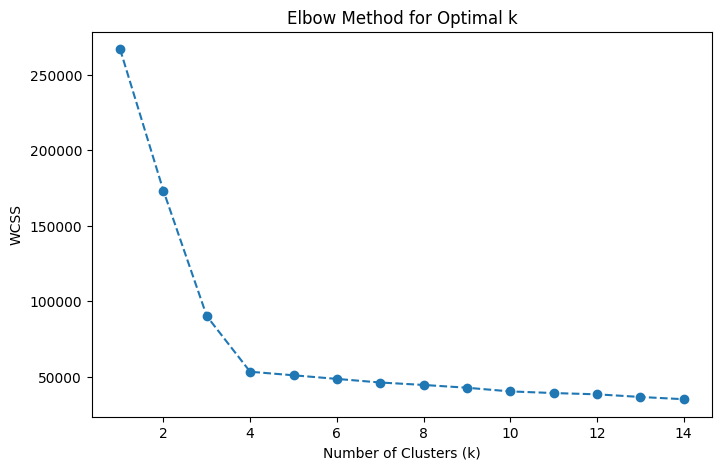

In [31]:
# -----------------------------
# 2. Elbow Method to find optimal k - The Elbow Method is one of the most popular techniques to determine the optimal number of clusters (k) in K-Means clustering.
# -----------------------------
wcss = []  # Within-Cluster Sum of Squares. Also called Inertia in scikit-learn.

for k in range(1, 15):              # Try k = 1 to 15. We test multiple values because the best k is not known in advance.
    kmeans = KMeans(
        n_clusters=k, 
        init="k-means++",           # centroid initialization method that speeds up convergence and avoids poor clustering results. [random, forgy, random_partition, etc.]
        random_state=42
    )
    kmeans.fit(X)                   # Fits the KMeans model on the dataset X (learns the cluster centroids)
    wcss.append(kmeans.inertia_)    # Inertia = WCSS. scikit-learn’s attribute that stores the final WCSS for the fitted clustering model.

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 15), wcss, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

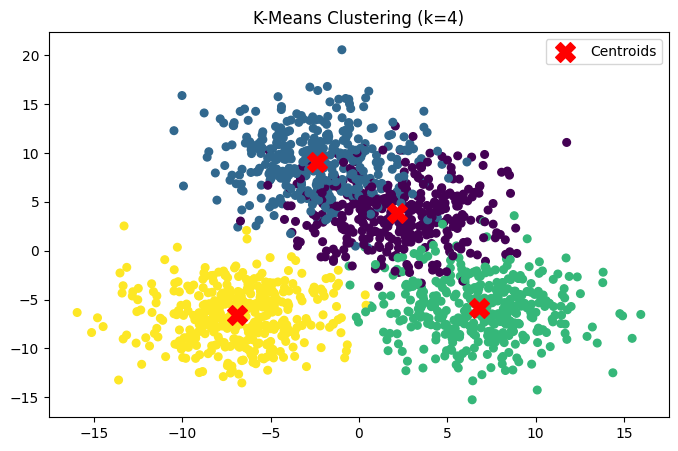

In [32]:
# -----------------------------
# 3. Fit KMeans with optimal k
# -----------------------------
optimal_k = 4  # From elbow curve (pick after visual inspection)
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X) # fit_predict(X) both trains the model and tells you which cluster each point belongs to. y_kmeans is basically the map of data points to clusters.

# -----------------------------
# Visualize Clusters
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="red", marker="X", label="Centroids")
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.legend()
plt.show()

#### Hierarchical Clustering
- Does not require the number of clusters to be specified in advance.
- Suitable for small to medium-sized datasets; becomes computationally expensive for very large datasets.
- Can capture nested clusters and works well when clusters are not necessarily spherical.
- However, sensitive to noise and outliers, which can create misleading merges.

In [47]:
# Hierarchical Clustering Example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# -----------------------------
# 1. Generate synthetic dataset
# -----------------------------
X, y = make_blobs(n_samples=7500, n_features=25, centers=6, cluster_std=0.2, random_state=42)


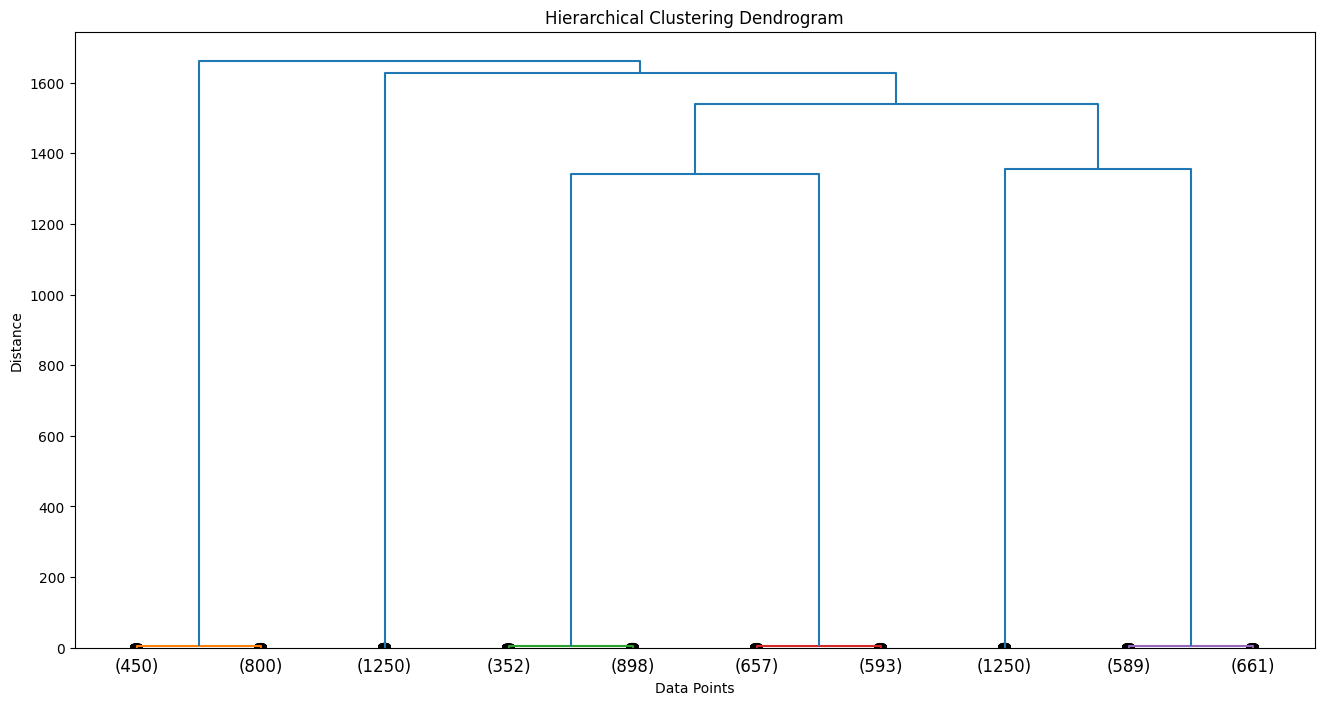

In [48]:
# -----------------------------
# 2. Plot Dendrogram - plots a tree diagram (dendrogram) that shows the hierarchy of clusters.
# -----------------------------
plt.figure(figsize=(16, 8))
linked = linkage(X, method="ward")  # calculates how to merge points/clusters step by step
dendrogram(linked, truncate_mode="lastp", p=10, show_contracted=True)  # 'lastp' shows the last p clusters
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

What it shows:
- X-axis: Data points (or clusters).
- Y-axis: Distance at which clusters are merged.
- Branches: Each branch represents a cluster merge.
- Height: Higher merge means clusters are more dissimilar.

Use:
- By cutting the dendrogram at a certain height, you can decide the number of clusters without specifying it in advance.
- Taller vertical lines indicate merges of very different clusters; short lines indicate merges of very similar clusters.

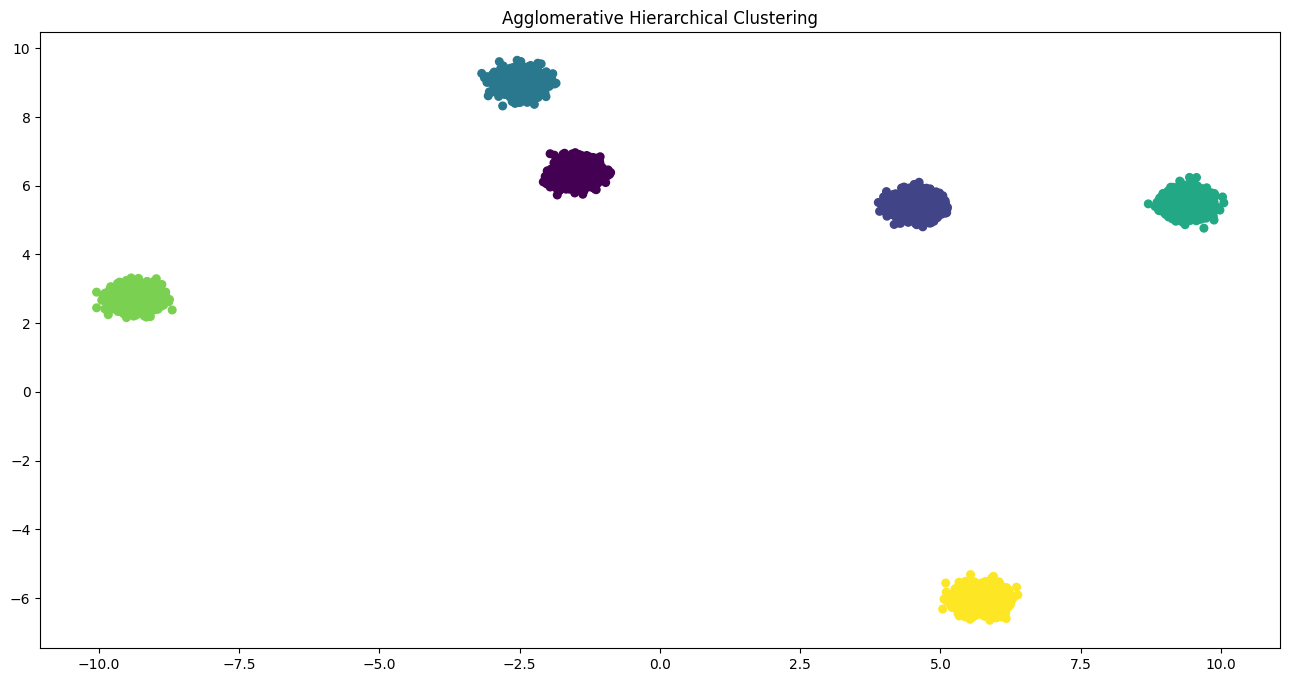

In [49]:
# -----------------------------
# 3. Apply Agglomerative Clustering 
# -----------------------------
hc = AgglomerativeClustering( 
    n_clusters=6, 
    metric="euclidean", 
    linkage="ward"
)
y_hc = hc.fit_predict(X)

# -----------------------------
# 4. Visualize Final Clusters
# -----------------------------
plt.figure(figsize=(16, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_hc, cmap="viridis", s=30)
plt.title("Agglomerative Hierarchical Clustering")
plt.show()

What is Agglomerative Clustering?
- Agglomerative clustering is a type of hierarchical clustering.
    - Start: Treat each data point as its own cluster.
    - Merge: Iteratively merge the two closest clusters based on a distance metric.
    - Stop: Continue merging until you reach the desired number of clusters or a distance threshold.

- Distance between clusters can be calculated in different ways:
    - Single linkage: distance between the closest points
    - Complete linkage: distance between the farthest points
    - Average linkage: average distance between points in clusters
    - Ward’s method: minimizes variance within clusters (default in scikit-learn)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Performace Evaluation of Unsupervised Learning Algorithms
- No single universal metric for unsupervised evaluation; use a combination of metrics.
- Internal metrics (Measures cluster quality based on the data itself) are most commonly used when ground truth is unavailable.
- Visualization and domain knowledge are essential for practical validation.

#### Silhouette Score
- Measures how well a data point fits within its own cluster compared to other clusters.
- Range: -1 to 1, where +1 indicates the point is well matched to its cluster, 0 indicates it lies near a cluster boundary, and -1 indicates possible misassignment to the wrong cluster.
- Intuitive and easy to interpret.
- Computationally heavy for very large datasets.
- Less reliable when clusters have different shapes, densities, or sizes.

k=2, Average Silhouette Score=0.698
k=3, Average Silhouette Score=0.897
k=4, Average Silhouette Score=0.662
k=5, Average Silhouette Score=0.420
k=6, Average Silhouette Score=0.414
k=7, Average Silhouette Score=0.416
k=8, Average Silhouette Score=0.416
k=9, Average Silhouette Score=0.187
k=10, Average Silhouette Score=0.185


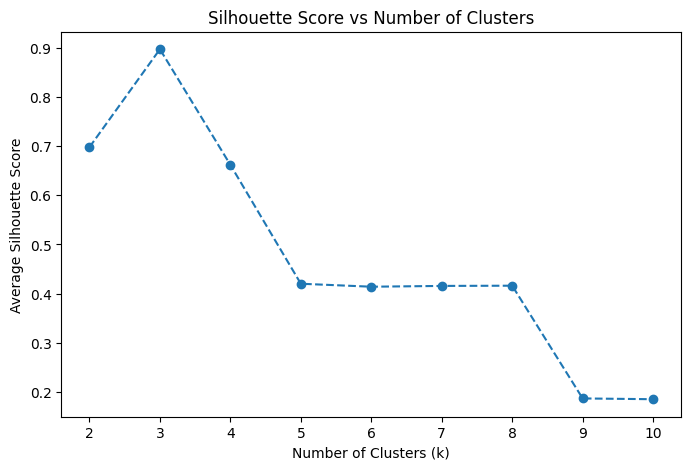

In [51]:
# Silhouette Score vs. Number of Clusters
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# -----------------------------
# 1. Generate synthetic dataset
# -----------------------------
X, y = make_blobs(n_samples=500, n_features=4, centers=3, cluster_std=0.6, random_state=42)

# -----------------------------
# 2. Test multiple k values
# -----------------------------
k_values = range(2, 11)  # testing k = 2 to 10
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Average Silhouette Score={score:.3f}")

# -----------------------------
# 3. Plot silhouette score vs k
# -----------------------------
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.xticks(k_values)
plt.show()


#### Davies–Bouldin Index (DBI)
- Measures the average similarity between each cluster and its most similar cluster, considering both cluster scatter and separation.
- Lower values indicate better clustering, as clusters are more compact and well-separated.
- Computationally efficient and works for various cluster shapes.

k=2, Davies–Bouldin Index=0.795
k=3, Davies–Bouldin Index=0.468
k=4, Davies–Bouldin Index=0.312
k=5, Davies–Bouldin Index=0.190
k=6, Davies–Bouldin Index=0.108
k=7, Davies–Bouldin Index=0.027
k=8, Davies–Bouldin Index=0.013
k=9, Davies–Bouldin Index=0.277
k=10, Davies–Bouldin Index=0.448


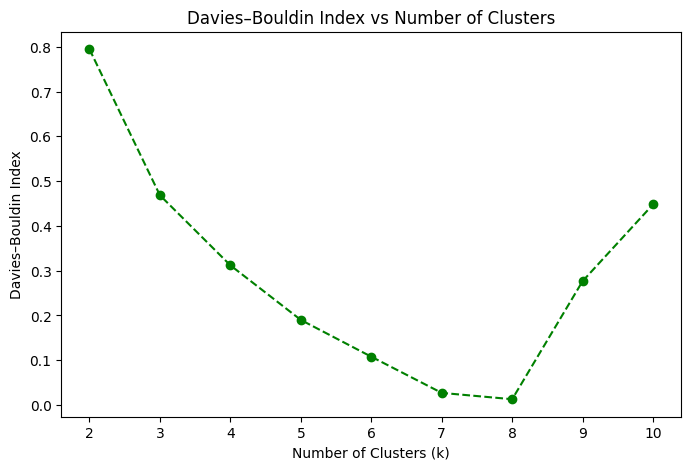

In [56]:
# Davies–Bouldin Index vs. Number of Clusters
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# -----------------------------
# 1. Generate synthetic dataset
# -----------------------------
X, y = make_blobs(n_samples=500, n_features=2, centers=8, cluster_std=0.01, random_state=42)

# -----------------------------
# 2. Test multiple k values
# -----------------------------
k_values = range(2, 11)  # testing k = 2 to 10
dbi_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    labels = kmeans.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)
    dbi_scores.append(dbi)
    print(f"k={k}, Davies–Bouldin Index={dbi:.3f}")

# -----------------------------
# 3. Plot DBI vs k
# -----------------------------
plt.figure(figsize=(8, 5))
plt.plot(k_values, dbi_scores, marker="o", linestyle="--", color="green")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies–Bouldin Index")
plt.title("Davies–Bouldin Index vs Number of Clusters")
plt.xticks(k_values)
plt.show()